### Matplotlib

* 2D grafikler çizmek için kullalan temel kütüphanedir.
* 2D üzerinde 3d grafikler, resimler çizilebilir, animasyon grafikler oluşturulabilir.
* Bir çok grafik türünü destekler, grafikleri programatik olarak düzenleyebilmek çok esneklik sağlar.
* Grafikleri pdf, png vs. gibi formatlar kaydedilebilir, baskı kalitesi ayarlanarak yayınlanabilir.

* 3 katan mevcut:
    1. Scripting Layer: her şey bir aradadır. işleri otomatikleştirir. import matplotlib.pyplot
    2. Artist Layer: Figure, axes, line, text vs. ile ilgilenir.
    3. Backend Layer: FigureCanvas, Render, Event vs.
    
* Başlangıçta kullanılan bazı kısa yollar

```python
#yeni pencere açar.
%matplotlib

#notebook üzerinde statik resim gösterir.
%matplotlib inline

#zoom edilebilir bir resim gösterir.
%matplotlib inline
```
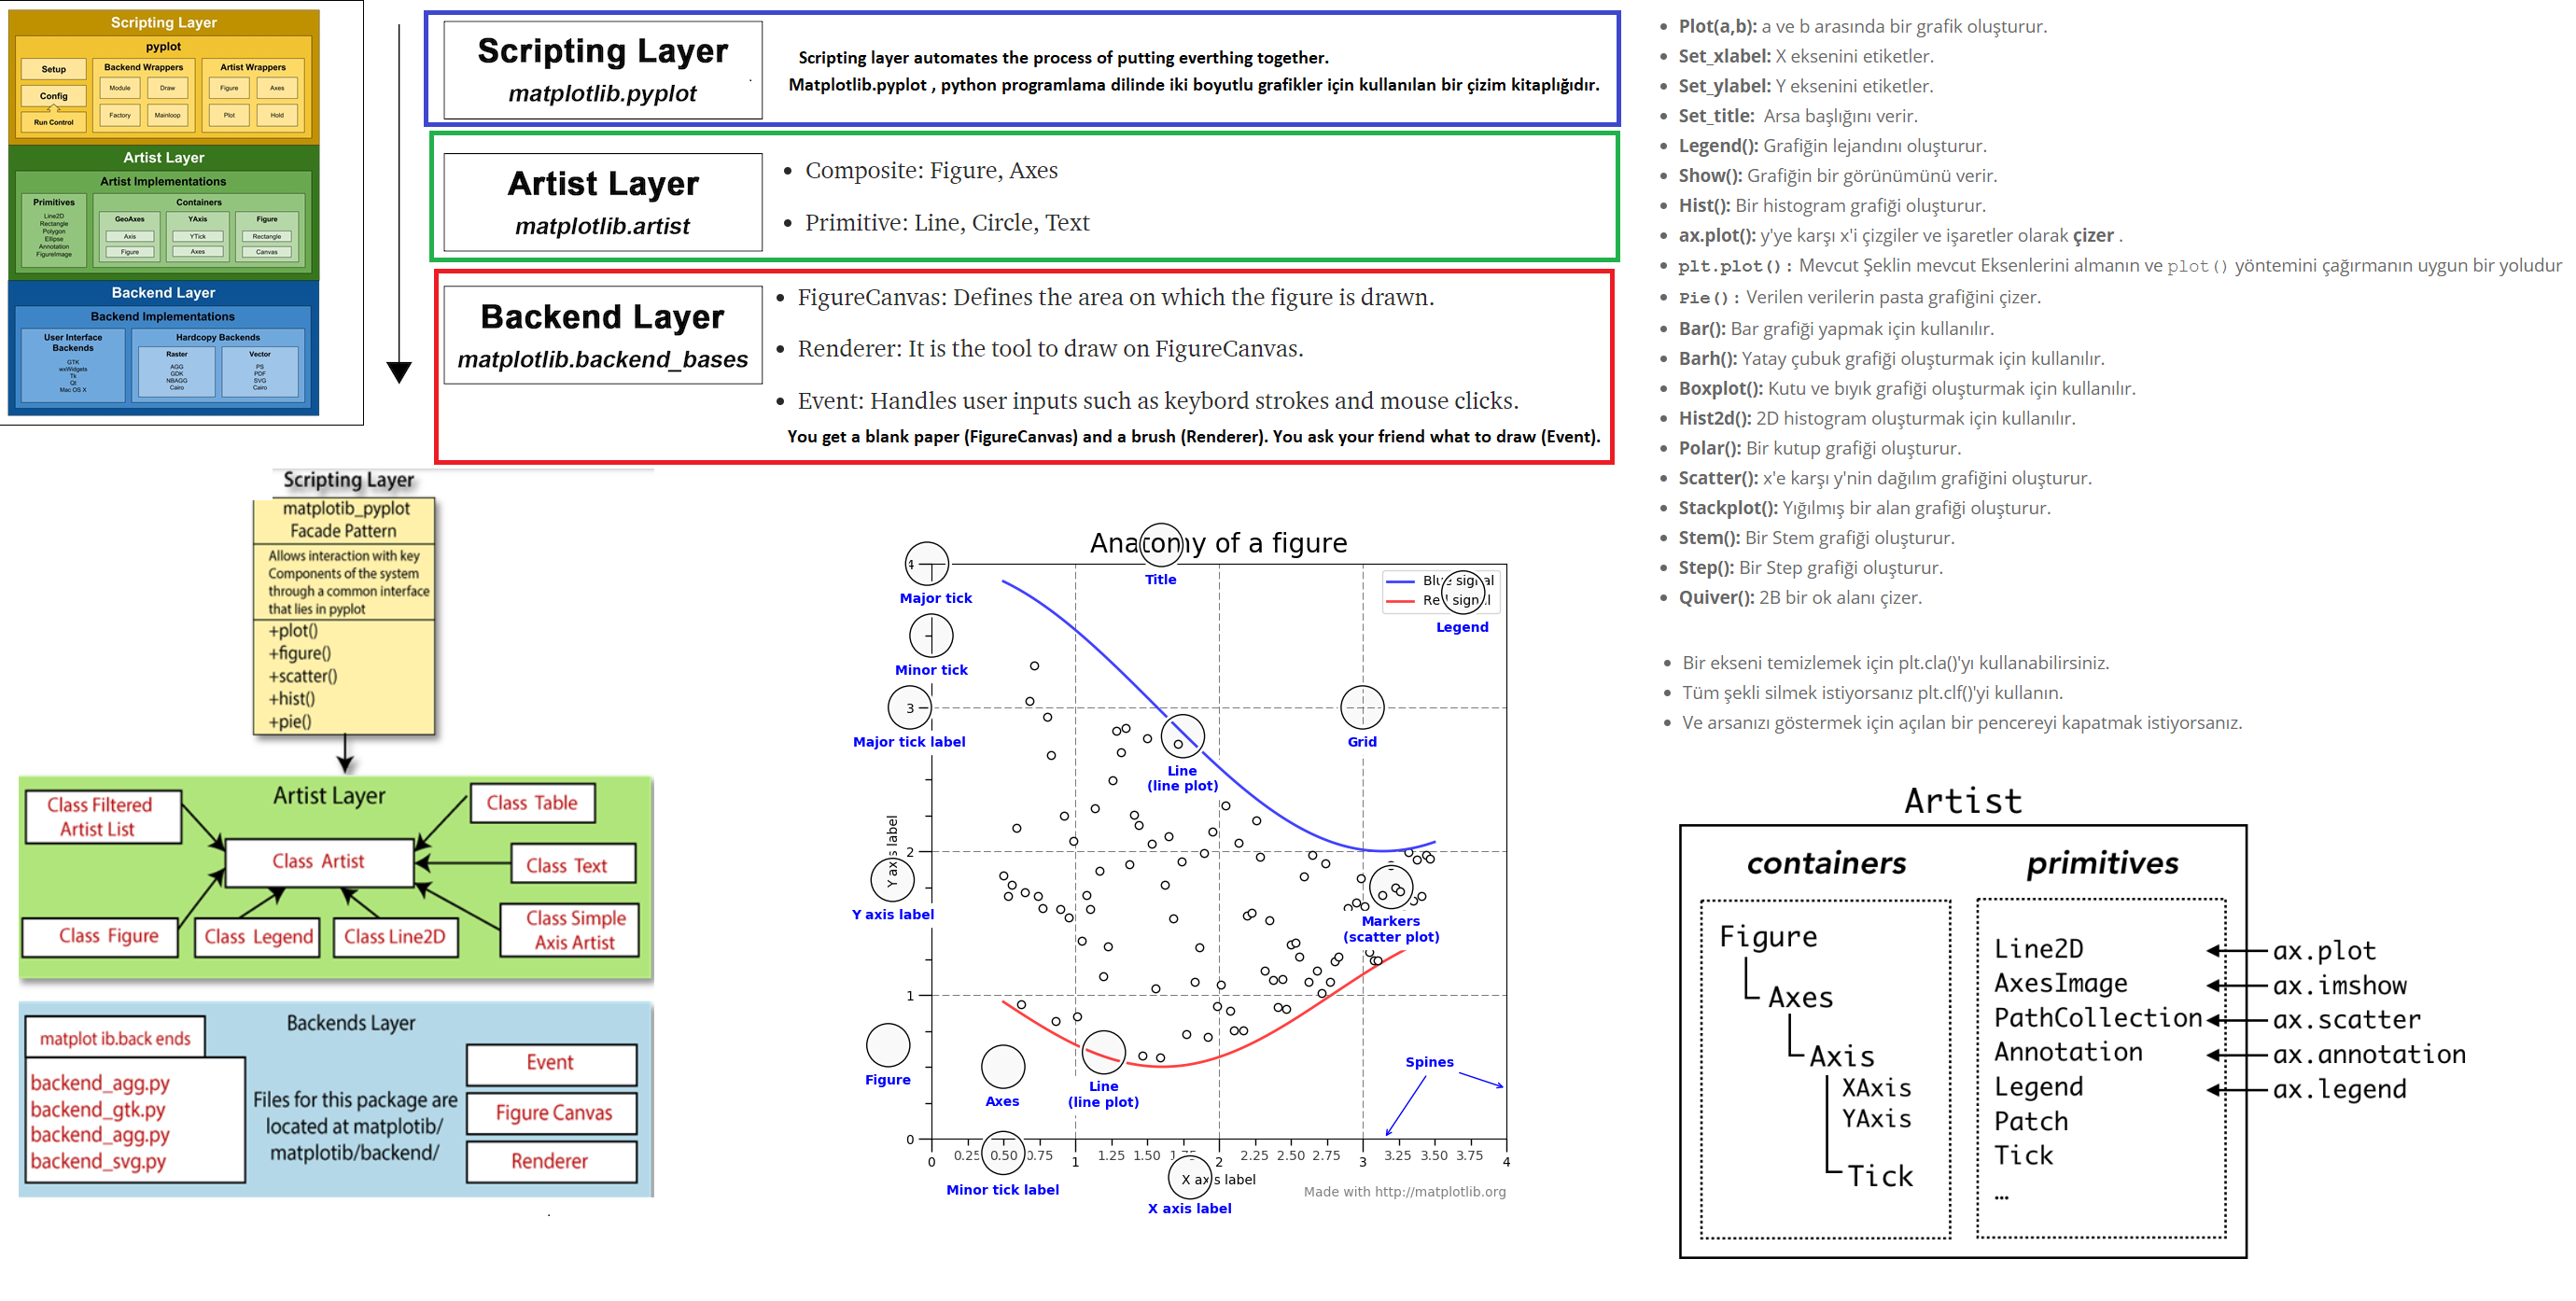

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Tek plot ile Çalışmak

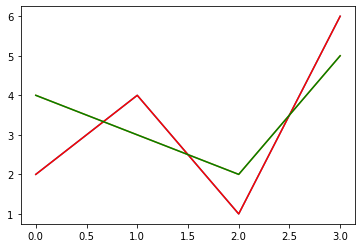

In [7]:
#1.
plt.plot([0,1,2,3], [2,4,1,6])
plt.plot([0,1,2,3], [4,3,2,5])

#.
plt.plot([0,1,2,3], [2,4,1,6],"red",
         [0,1,2,3], [4,3,2,5],"green"
        )

plt.show()

### Grafik özellikleri

In [3]:
x = np.arange(5)
y = x**3

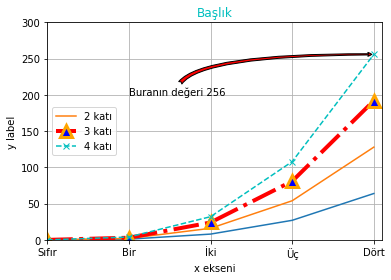

<Figure size 432x288 with 0 Axes>

In [4]:
plt.plot(x,y)
plt.plot(x,y*2, label="2 katı") #legenda görünür

plt.plot(x,y*3, label="3 katı",
                color="red",
                linestyle="dashdot",
                linewidth=4,
                marker="^",
                markersize=12,
                 markerfacecolor="blue",
                 markeredgecolor="orange",
                 markeredgewidth=3
        )

plt.plot(x,y*4,"cx--",label="4 katı")

#grid
plt.grid(True)

#---
#xticks
#print(plt.xticks()) #görünenler ve lokasyonları
#locs, labels = plt.xticks()

plt.xticks(range(len(x)) , ["Sıfır","Bir","İki","Üç","Dört"])

#polar zemin
#plt.axes(polar=True)

#eksenleri gizleyebiliriz.
#plt.axes().get_xaxis().set_visible(True)
#plt.axis("off")

#eksen limitlerini belirleme
plt.axis([0,4.1, 0,300]) #[xmin, xmax, ymin, ymax]
#plt.xlim([]) #min, max


#
plt.title("Başlık",fontsize=12, color="c")
plt.xlabel("x ekseni")
plt.ylabel("y label")

#legend
plt.legend(loc="center left") #labellarda yazdığımız görünür.
#plt.legend(labellar listesi,)

#annotate
plt.annotate("Buranın değeri 256",
            xy=(4,256), xytext=(1,200),
             arrowprops={
                         "facecolor":"red",
                         "arrowstyle":"fancy",
                         "connectionstyle":"angle3"
                         }
            )



#---
plt.show()

#
plt.savefig("Grafik.png", format="png")


#figure silmek için
#plt.clf()
#plt.plot([1,2,3])

#### 3d grafik çizme

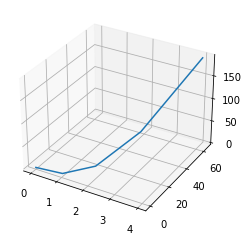

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d") #111 nrow, ncol, index
ax.plot(x,y,y*3)

### Birden fazla plot ile çalışma

### 1. `plt.figure()` ile

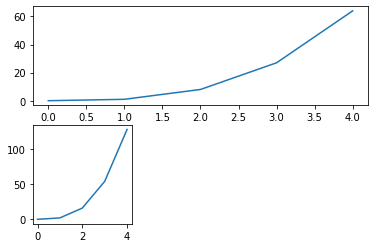

In [6]:
fig = plt.figure()

ax=fig.add_subplot(2,3, (1,3)) #2 satır 3 sutunluk bir alan. 1-3 arasını rezerve ettik.
ax.plot(x,y)


ax2=fig.add_subplot(2,3, (4)) 
ax2.plot(x,y*2)

### 2. `plt.subplot()`

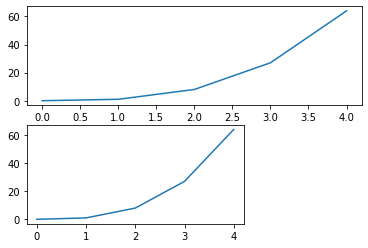

In [65]:
ax = plt.subplot(2,3,(1,3))
ax.plot(x,y)

ax2 = plt.subplot(2,3,(4,5))
ax2.plot(x,y)

#### 3. `plt.subplots()`

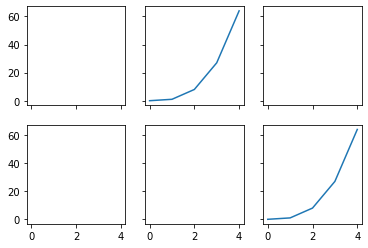

In [67]:
fig, axs = plt.subplots(2,3, sharex=True, sharey=True)

axs[0,1].plot(x,y)
axs[1,2].plot(x,y)

#### Gridspec ile farklı büyüklerde çizim

In [7]:
import matplotlib.gridspec as gridspec

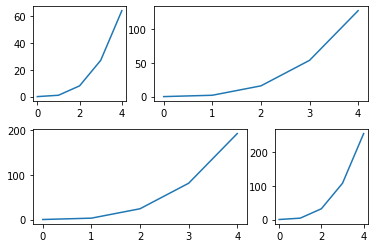

In [8]:
gs = plt.GridSpec(2,3, wspace=0.3, hspace=0.3)

fig = plt.figure()

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1:])
ax3 = fig.add_subplot(gs[1,:2])
ax4 = fig.add_subplot(gs[1,2])

#
ax1.plot(x,y)
ax2.plot(x,y*2)
ax3.plot(x,y*3)
ax4.plot(x,y*4)

plt.show()

### İleri düzey ayarlar
* `rcParams` ile varsayılan özellikler değiştirilebilir

In [9]:
import matplotlib as mpl

#### Varsayılan ayarları okumak ve değiştirmek

In [84]:
#mpl.rcParams
mpl.rcParams["figure.figsize"] #inch ollarak en boy
#mpl.rcParams["savefig.dpi"]

mpl.rcParams["font.size"]
mpl.rcParams["font.size"] = 15 #değiştirebiliriz.

#varsayılan değerler dönme
mpl.rcdefaults()

10.0

In [86]:
mpl.rcParams["lines.linewidth"] = 4
mpl.rcParams["lines.color"] = "red"

#veya kısaca
mpl.rc("lines", linewidth=4, color="red")

<ipython-input-92-90990897e086>:11: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


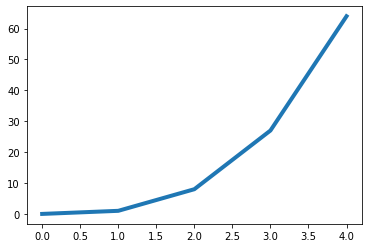

In [92]:
#vectorel kayıt

plt.plot(x,y)


#mpl.use('pdf') #render etme yöntemi belirtilir.
mpl.use('agg')

#plt.savefig("plot.pdf")

plt.show()

#### interactive mode

* Bu modda çalışırken özellikle komut satırında grafik özellikleri değiştiğinde grafikte anlık olarak değişimi görebiliriz. mode interactive değilse show ile göstermek gerekiyor.

In [93]:
mpl.rcParams["interactive"]

True

In [94]:
mpl.interactive(True)

#plt.ion() #mode açar.
#plt.ioff()

mpl.is_interactive()

True

### Grafiklere Örnekler

#### Hist

<ipython-input-99-5d9fa6485825>:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


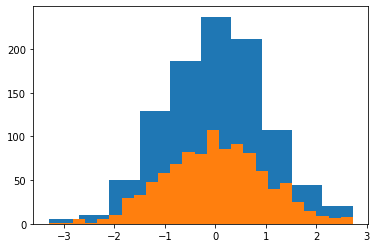

In [99]:
h = np.random.randn(1000)


plt.hist(h)
plt.hist(h, bins=25)

plt.show()

#### Bar

<ipython-input-114-ff98f65f3ff8>:18: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


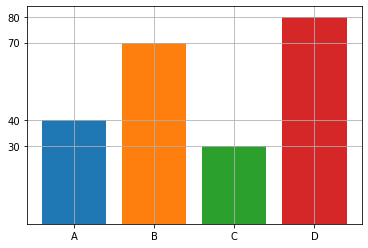

In [114]:
#plt.bar([1,2,3], [3,2,5])


#
dct  = {"A":40, "B":70, "C":30, "D":80}

for i,key in enumerate(dct.keys()):
    plt.bar(i, dct[key])
    
#
plt.xticks(range(len(dct)) , dct.keys())
plt.yticks(list(dct.values()))

plt.grid()

plt.show()

#### Pie

<ipython-input-146-0b360f148156>:10: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


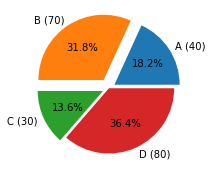

In [146]:
plt.figure(figsize=(3,3))

plt.pie(dct.values(),
        labels=[f"{d[0]} ({d[1]})" for d in dct.items()],
        explode=[0.1,0.15,0.1,0],
        autopct="%1.1f%%"
       )

plt.show()

In [11]:
#hazır renk skalaları
#dir(plt.cm)

#### Scatter

<ipython-input-171-24ee4a6a460e>:10: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


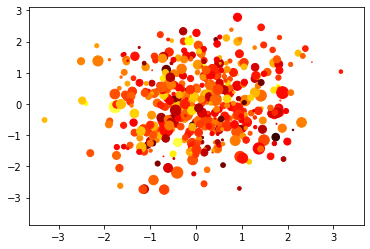

In [171]:
x = np.random.randn(1000)
y = np.random.randn(1000)

size  = 50*np.random.randn(1000)
colors= np.random.randn(1000)

plt.scatter(x,y,s=size,c=colors, cmap=plt.get_cmap("hot"))

plt.show()

#### Cmap

(10, 10)


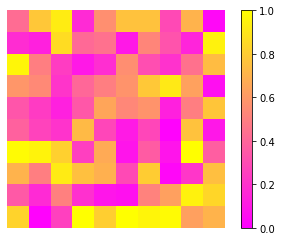

In [13]:
X = np.random.rand(10,10)
print(X.shape)

plt.imshow(X,
            cmap=plt.get_cmap("spring"),
            vmin=0, vmax=1 #renk skalasının aralığı 
          )

plt.colorbar()
plt.axis("off")

plt.show()

#### Birden fazla plot çizerek

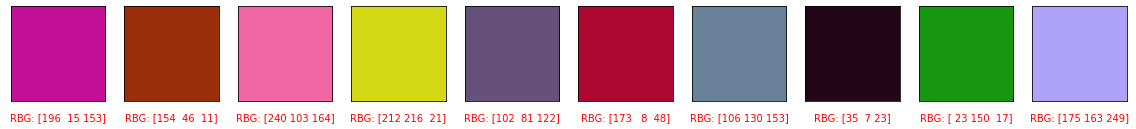

In [16]:
sample_size = 10

fig, ax = plt.subplots(nrows=1, ncols=sample_size, figsize=(20,5))

for i in range(sample_size):
    X = np.random.randint(0,255 , (1,1,3))
    ax[i].imshow(X) #piksel
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)
    ax[i].text(x=0, y=0.7, s=f"RBG: {X[0,0]}",horizontalalignment="center", color="red", fontsize=10)

### Grafik üzerine sayı etiketleri ekleme

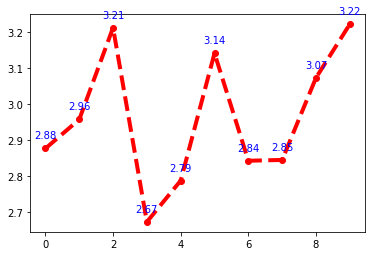

In [234]:
x = np.arange(0,10,1)
y = np.random.normal(loc=3, scale=0.3, size=10)


plt.plot(x,y, 'ro--')

for w,h in zip(x,y):
    plt.annotate("{:.2f}".format(h),
                 xy=(w,h),
                 textcoords="offset points", #offset points'     Offset (in points) from the *xy* value
                 xytext=(0,10),
                 color="blue",
                 ha="center"
                )

### Resim okuma

(512, 512, 3)


<ipython-input-253-5dd076cb42d6>:13: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


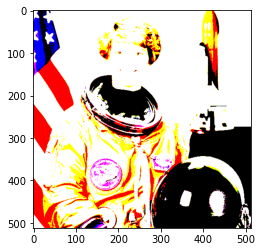

In [253]:
import imageio as io

resim = io.imread("imageio:astronaut.png") #kütüphanedeki gömülü resim

print(resim.shape)

resim[:,:,0] #kırmızı renkler
#--------
resim = np.where(resim>50, 255,0)

#---
plt.imshow(resim)
plt.show()

### Animasyon Grafik

In [18]:
yil, satis = np.loadtxt("databases/veriler.csv", delimiter=",", unpack=True)
yil = yil.astype(int)


#----
print(yil.shape, yil.dtype)
print(satis.shape, satis.dtype)

(6,) int32
(6,) float64


In [19]:
from matplotlib.animation import FuncAnimation

MovieWriter Pillow unavailable; using Pillow instead.


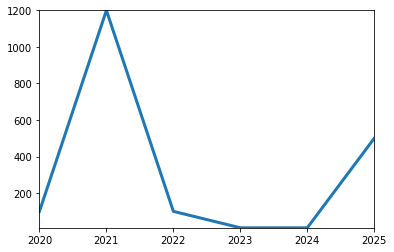

In [20]:
#çizim ortamını hazırlalım
fig = plt.figure()
ax = plt.axes()

line, = ax.plot([],[],lw=3) #çizgileri yakalayalım

#animasyon yapacak fonksiyon
def fnk_init(): #ilk frameden önce çağırılır.
    line.set_data([],[])
    return line,
def fnk_animate(frame): #her framede çalışan fonks.
    yil, satis = np.loadtxt("databases/veriler.csv", delimiter=",", unpack=True)
    yil = yil.astype(int)
    
    ax.set_xlim(yil.min(), yil.max())
    ax.set_ylim(satis.min(), satis.max())
    
    line.set_data(yil,satis)
    return line,

#----------------
#atama yapalım
anim = FuncAnimation(fig,
                     func = fnk_animate, init_func=fnk_init,
                     frames=500,
                     interval=20
                    )

anim.save("satilar.gif", writer="Pillow")